# KNN for Social Network Ads

#### Step 1 : Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Step 2 : Import DataSet

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Step 3 : Analysing and Vizualization

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


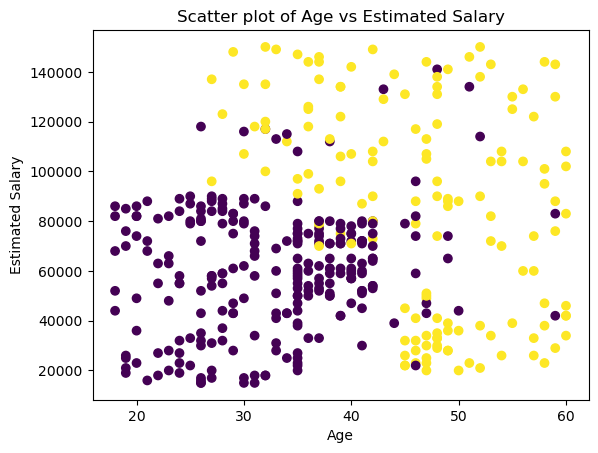

In [5]:
print(data.head())  # Print the first few rows of the dataset

In [6]:
print(data.describe())  # Summary statistics of the dataset

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


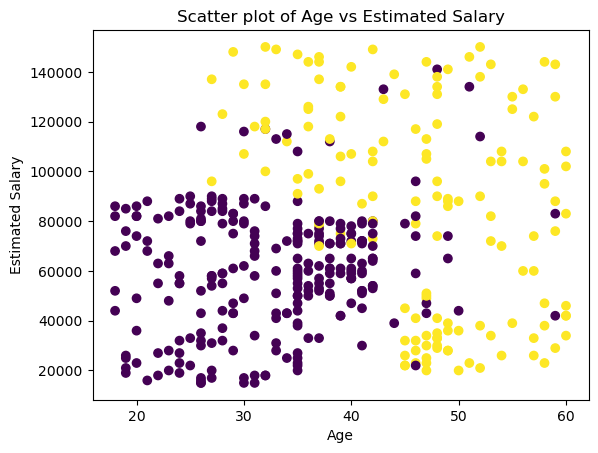

In [7]:
# Visualize the data
plt.scatter(data['Age'], data['EstimatedSalary'], c=data['Purchased'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter plot of Age vs Estimated Salary')
plt.show()

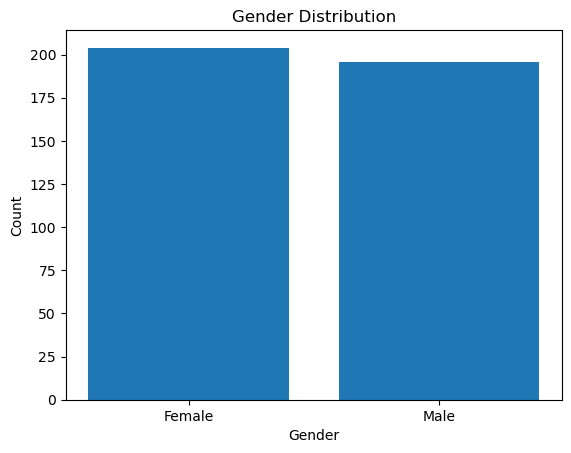

In [9]:
gender_counts = data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

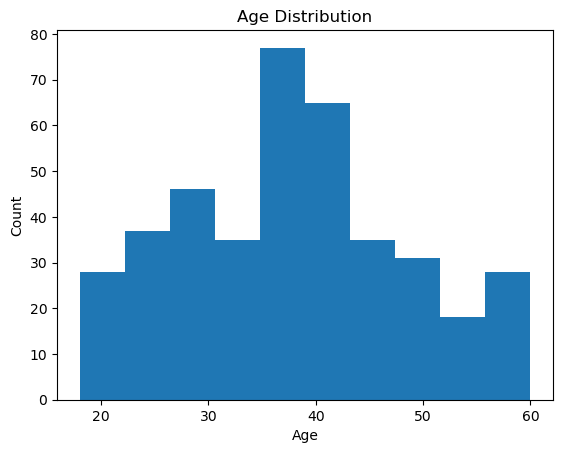

In [10]:
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

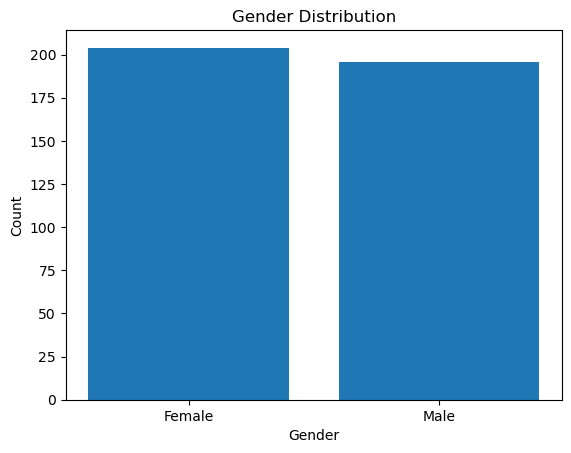

In [11]:
gender_counts = data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

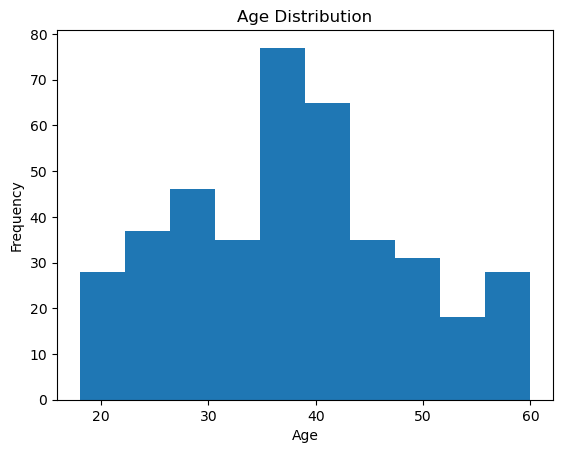

In [13]:
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

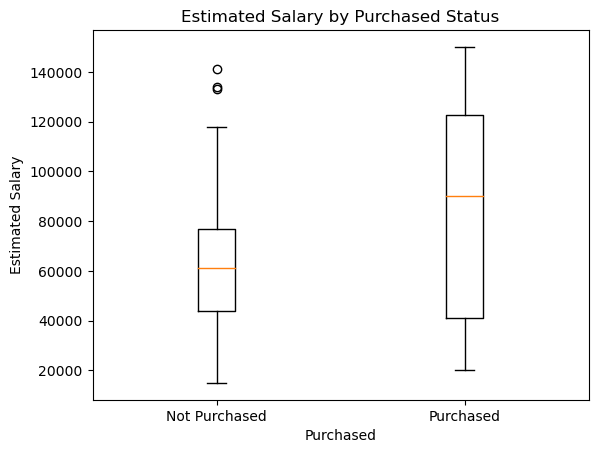

In [14]:
plt.boxplot([data[data['Purchased'] == 0]['EstimatedSalary'], data[data['Purchased'] == 1]['EstimatedSalary']], labels=['Not Purchased', 'Purchased'])
plt.xlabel('Purchased')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salary by Purchased Status')
plt.show()

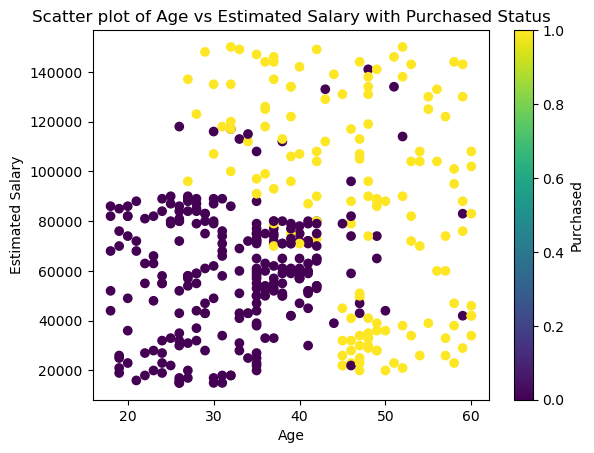

In [16]:
plt.scatter(data['Age'], data['EstimatedSalary'], c=data['Purchased'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter plot of Age vs Estimated Salary with Purchased Status')
plt.colorbar(label='Purchased')
plt.show()

#### Step 4 : Test Train Split

In [17]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 5 : Train the model

In [19]:
k = 3  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Step 6 : Evaluation

In [26]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,'%')

Accuracy: 75.0 %


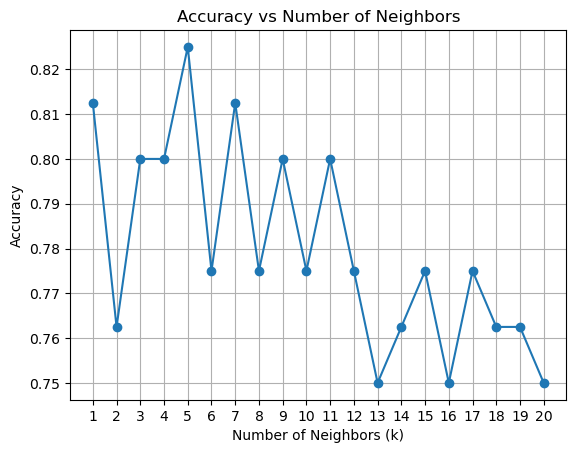

In [23]:
# Varying k and calculating accuracy
k_values = range(1, 21)  # Range of k values to consider
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting accuracy graph
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Since the accuracy is 75%, the model is considered to be good